In [10]:
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv('data/housing_data.csv')
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
house_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
house_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# Collect columns with none object data type
numeric_columns = [col for col in house_data.columns if house_data[col].dtype != object]
numeric_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

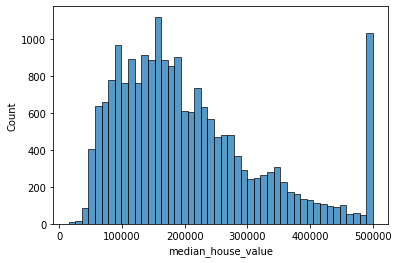

In [14]:
# Plot distribution of data for each numerical column

sns.histplot(house_data['median_house_value'])

In [12]:
COLORS = ['moccasin', 'lightsalmon','greenyellow','magenta','darkorange','dimgrey','royalblue','hotpink','tomato','darkorchid']

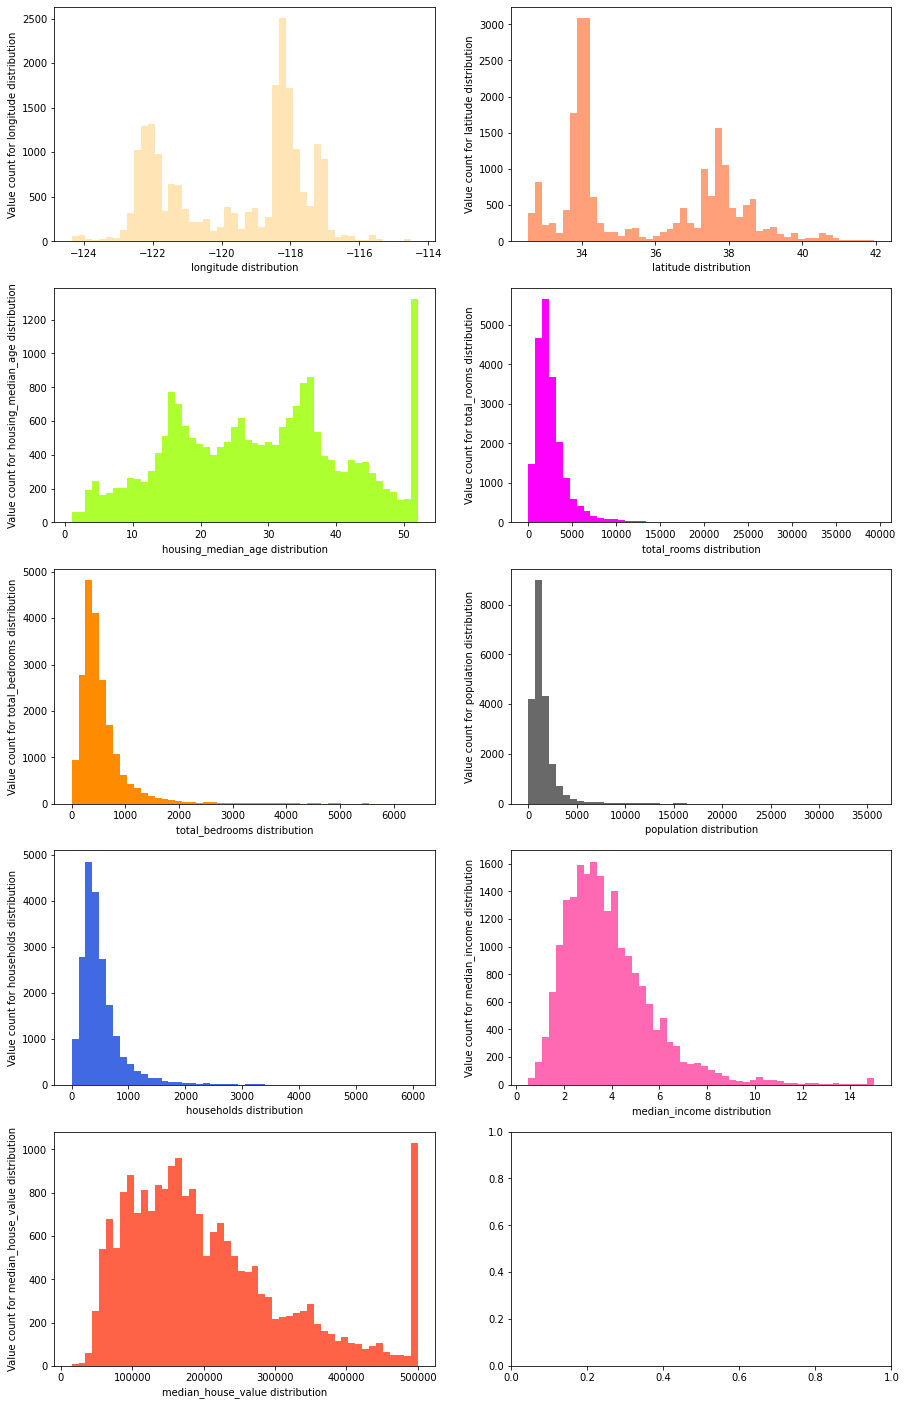

In [13]:

columns = 2 # Numbers of columns needed
rows = ceil(len(numeric_columns) / 2) # Generates rows to match features

fig, ax = plt.subplots(rows, columns, figsize=(15,5 * rows))

for data in range(rows):
        # Plot distribution for first column
        ax[data,0].hist(house_data[numeric_columns[2*data]], bins=50, color=COLORS[2*data])
        ax[data,0].set_xlabel('{} distribution'.format(numeric_columns[2*data]))
        ax[data,0].set_ylabel('Value count for {} distribution'.format(numeric_columns[2*data]))
        
        # Check for a need for second column, then Plot distribution for second column
        if (2*data + 1) < len(numeric_columns) :
            ax[data,1].hist(house_data[numeric_columns[2*data + 1]],bins=50, color=COLORS[2*data + 1])
            ax[data,1].set_xlabel('{} distribution'.format(numeric_columns[2*data + 1]))
            ax[data,1].set_ylabel('Value count for {} distribution'.format(numeric_columns[2*data + 1]))

        
plt.show()

In [38]:
# Confrim the shape of data for appropriate spliting
print(f'The shape of house data is: {(house_data.shape)[0]}')

The shape of house data is: 20640


### Question 3 <br>
We need to deal with missing values for the column from Q1.<br>
We have two options: fill it with 0 or with the mean of this variable.<br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?

In [86]:
# fill nan with 0
house_data_nan_zero = house_data.fillna(0)
house_data_nan_zero.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [80]:
# fill nan with mean
house_data_nan_mean = house_data.copy()
house_data_nan_mean['total_bedrooms'] = house_data_nan_mean['total_bedrooms'].fillna(house_data_nan_mean['total_bedrooms'].mean())
house_data_nan_mean.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [81]:
house_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Split the data 
Shuffle the initial dataset, use seed 42. <br>
Split your data in train/val/test sets, with 60%/20%/20% distribution. <br>
Make sure that the target value ('median_house_value') is not in your dataframe.<br>
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [98]:
def train_val_test_split(df, split_ratio=(0.6,0.2,0.2), SEED=42 ):
    df_len = len(df) 
    # Generate numbers
    new_idx = np.arange(df_len)
    # Generate seed to make randomness regenerateble
    np.random.seed(SEED)
    # Shuffle the new index
    np.random.shuffle(new_idx)
    
    if len(split_ratio) == 3 :
        train_set = int(df_len * split_ratio[0])
        val_set = int(df_len * split_ratio[1])
        test_set = df_len - train_set - val_set
        df_train = df.iloc[new_idx[:train_set]]
        df_val = df.iloc[new_idx[train_set:train_set+val_set]]
        df_test = df.iloc[new_idx[train_set+val_set:]]
        
        df_train = df_train.reset_index(drop=True)
        df_val = df_val.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)
        return (df_train, df_val, df_test)
    
    else :
        train_set = int(df_len * split_ratio[0])
        test_set = df_len - train_set
        df_train = df.iloc[new_idx[:train_set]]
        df_test = df.iloc[new_idx[train_set:]]
        
        df_train = df_train.reset_index(drop=True)
        df_val = df_val.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)
        
        return (df_train, df_test)
        
    

### Data Spliting and Training of LinearRegression model <br>
#### i). House data with NaN replaced with zero

In [102]:
df_train, df_val, df_test = train_val_test_split(house_data_nan_zero)

#### Apply the log transformation to the median_house_value

In [103]:
df_train['median_house_value'] = np.log1p(df_train['median_house_value'])
df_val['median_house_value'] = np.log1p(df_val['median_house_value'])
df_test['median_house_value'] = np.log1p(df_test['median_house_value'])

In [104]:
print('The shape of train dataset is: ', df_train.shape)
df_train.head()

The shape of train dataset is:  (12384, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812,10.772708,INLAND
1,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313,10.732061,INLAND
2,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801,13.122367,NEAR BAY
3,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376,12.295003,<1H OCEAN
4,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250,12.535380,NEAR OCEAN


In [105]:
print('The shape of validation dataset is: ', df_val.shape)
df_val.head()

The shape of validation dataset is:  (4128, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531,11.441440,INLAND
1,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350,12.151622,<1H OCEAN
2,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,12.740813,<1H OCEAN
3,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763,12.160557,<1H OCEAN
4,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,12.584855,NEAR BAY


In [106]:
print('The shape of test dataset is: ', df_test.shape)
df_test.head()

The shape of test dataset is:  (4128, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,10.981914,INLAND
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,12.018544,<1H OCEAN
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,11.845110,<1H OCEAN
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,11.585255,INLAND
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,11.582461,INLAND


In [107]:
# Create train features and dependant variable
X_train = df_train.drop(columns=['median_house_value','ocean_proximity'])
y_train = df_train['median_house_value']

# Create validation features and dependant variable
X_val = df_val.drop(columns=['median_house_value','ocean_proximity'])
y_val = df_val['median_house_value']

# Create test features and dependant variable
X_test = df_test.drop(columns=['median_house_value','ocean_proximity'])
y_test = df_test['median_house_value']

In [108]:
X_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801


In [ ]:
# def train_linear_regression(X, y):
#     ones = np.ones(X.shape[0])
#     X = np.column_stack([ones, X])

#     XTX = X.T.dot(X)
#     XTX_inv = np.linalg.inv(XTX)
#     w = XTX_inv.dot(X.T).dot(y)
    
#     return w[0], w[1:]

In [110]:
# import regression module
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
# create model object
lm = LinearRegression()
# train model
lm.fit(X_train, y_train)
RMSE_val = math.sqrt(metrics.mean_squared_error(y_val, lm.predict(X_val)))
print('With NaN replaced with 0, and without regularization, the RMSE on Validation dataset is: ', RMSE_val)

With NaN replaced with 0, and without regularization, the RMSE on Validation dataset is:  0.32953303652293175


#### ii). House data with NaN replaced with mean value

In [111]:
# Spilt data to train validation and test set
df_train_mean, df_val_mean, df_test_mean = train_val_test_split(house_data_nan_mean)

In [112]:
df_train_mean['median_house_value'] = np.log1p(df_train_mean['median_house_value'])
df_val_mean['median_house_value'] = np.log1p(df_val_mean['median_house_value'])
df_test_mean['median_house_value'] = np.log1p(df_test_mean['median_house_value'])

In [113]:
# Create train features and dependant variable
X_train_mean = df_train_mean.drop(columns=['median_house_value','ocean_proximity'])
y_train_mean = df_train_mean['median_house_value']

# Create validation features and dependant variable
X_val_mean = df_val_mean.drop(columns=['median_house_value','ocean_proximity'])
y_val_mean = df_val_mean['median_house_value']

# Create test features and dependant variable
X_test_mean = df_test_mean.drop(columns=['median_house_value','ocean_proximity'])
y_test_mean = df_test_mean['median_house_value']

In [114]:
# create model object
lm_mean = LinearRegression()
# train model
lm_mean.fit(X_train_mean, y_train_mean)
RMSE_val_mean = math.sqrt(metrics.mean_squared_error(y_val_mean, lm_mean.predict(X_val_mean)))
print('With NaN replaced with mean, and without regularization, the RMSE on Validation dataset is: ', RMSE_val_mean)

With NaN replaced with mean, and without regularization, the RMSE on Validation dataset is:  0.3290193910381869


### Question 4<br>
#### Regularization<br>
Now let's train a regularized linear regression.<br>
For this question, fill the NAs with 0.<br>
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].<br>
Use RMSE to evaluate the model on the validation dataset.<br>
Round the RMSE scores to 2 decimal digits.<br>
Which r gives the best RMSE?<br>
If there are multiple options, select the smallest r.<br>

Options:<br>

0<br>
0.000001<br>
0.001<br>
0.0001

In [116]:
# Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [117]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [118]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.3295330361655374
0.0001 0.3295330009702929
 0.001 0.32953270386766204
  0.01 0.3295319365995137
   0.1 0.3296947205386403
     1 0.33378872199962084
     5 0.3392485345501781
    10 0.34060638078076433


### Question 5<br>
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.<br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].<br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution.<br>
Fill the missing values with 0 and train a model without regularization.<br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.<br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.<br>
Round the result to 3 decimal digits (round(std, 3))<br>
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's<br> high, the values are different. If standard deviation of scores is low, then our model is stable.<br>

Options:<br>

0.16<br>
0.00005<br>
0.005<br>
0.15555

In [123]:
def data_prep(df, SEED=42):
    df_train, df_val, df_test = train_val_test_split(df,  (0.6,0.2,0.2),SEED)
    df_train['median_house_value'] = np.log1p(df_train['median_house_value'])
    df_val['median_house_value'] = np.log1p(df_val['median_house_value'])
    df_test['median_house_value'] = np.log1p(df_test['median_house_value'])
    
    return (df_train, df_val, df_test)

In [126]:
# Create train features and dependant variable
RMSE_scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test = data_prep(house_data_nan_zero,seed)
    X_train = df_train.drop(columns=['median_house_value','ocean_proximity'])
    y_train = df_train['median_house_value']

    # Create validation features and dependant variable
    X_val = df_val.drop(columns=['median_house_value','ocean_proximity'])
    y_val = df_val['median_house_value']

    # Create test features and dependant variable
    X_test = df_test.drop(columns=['median_house_value','ocean_proximity'])
    y_test = df_test['median_house_value']
    
    # train model
    lm.fit(X_train, y_train)
    
    #Evalueate model
    RMSE_val = math.sqrt(metrics.mean_squared_error(y_val, lm.predict(X_val)))
    
    #Add model RMSE value
    RMSE_scores.append(RMSE_val)
    
round(np.std(RMSE_scores), 3)

0.004

### Question 6 <br>
Split the dataset like previously, use seed 9.<br>
Combine train and validation datasets.<br>
Fill the missing values with 0 and train a model with r=0.001.<br>
What's the RMSE on the test dataset?<br>
Options:<br>

0.35<br>
0.135<br>
0.450<br>
0.245

In [128]:
df_train, df_val, df_test = data_prep(house_data_nan_zero,9)

df_train = pd.concat([df_train, df_val], ignore_index=True)

X_train = df_train.drop(columns=['median_house_value','ocean_proximity'])
y_train = df_train['median_house_value']

# Create test features and dependant variable
X_test = df_test.drop(columns=['median_house_value','ocean_proximity'])
y_test = df_test['median_house_value']

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_test.dot(w)
print('RMSE value is: ', rmse(y_test, y_pred))

RMSE value is:  0.34531689143584315


### DATA STANDARDIZATION

In [18]:
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler
# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X_value)
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X_value.columns)
X_standardise.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881


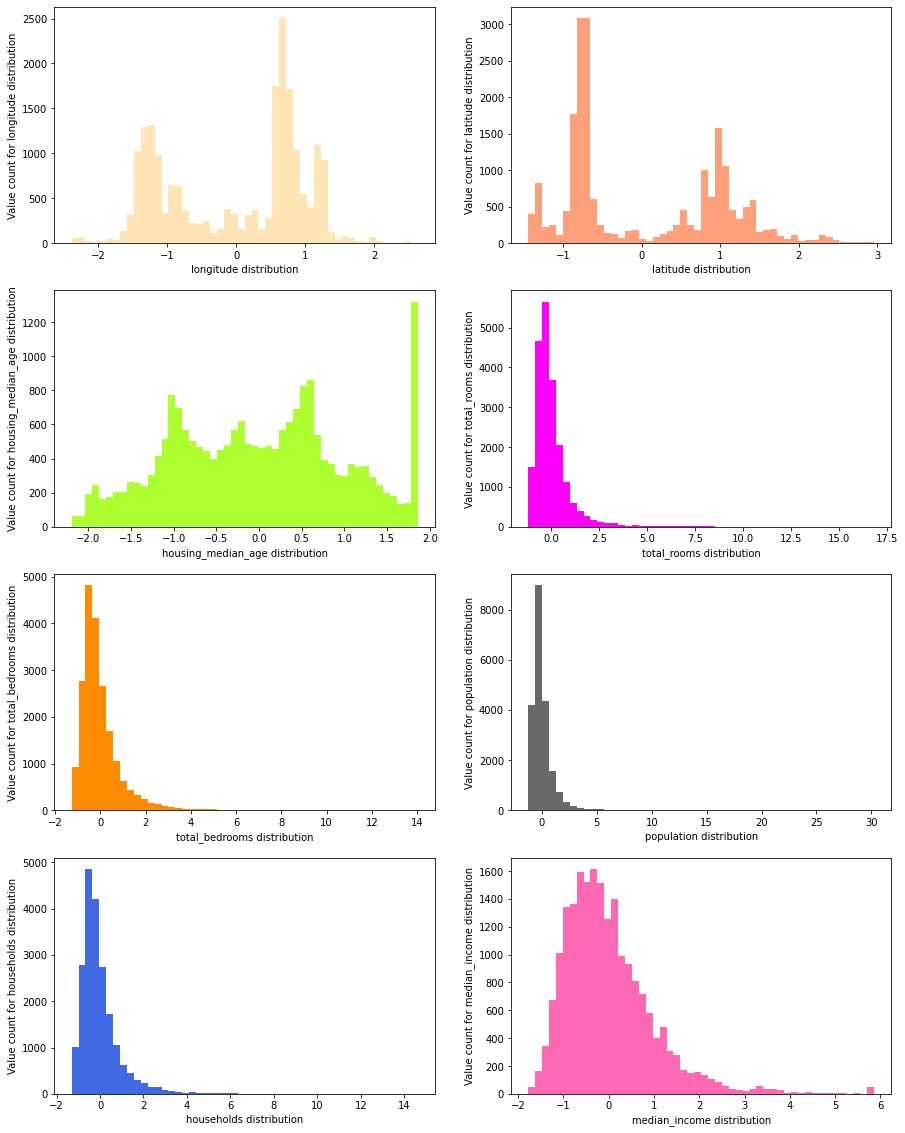

In [19]:
numeric_columns = X_standardise.columns
columns = 2 # Numbers of columns needed
rows = ceil(len(numeric_columns) / 2) # Generates rows to match features

fig, ax = plt.subplots(rows, columns, figsize=(15,5 * rows))

for data in range(rows):
        # Plot distribution for first column
        ax[data,0].hist(X_standardise[numeric_columns[2*data]], bins=50, color=COLORS[2*data])
        ax[data,0].set_xlabel('{} distribution'.format(numeric_columns[2*data]))
        ax[data,0].set_ylabel('Value count for {} distribution'.format(numeric_columns[2*data]))
        
        # Check for a need for second column, then Plot distribution for second column
        if (2*data + 1) < len(numeric_columns) :
            ax[data,1].hist(X_standardise[numeric_columns[2*data + 1]],bins=50, color=COLORS[2*data + 1])
            ax[data,1].set_xlabel('{} distribution'.format(numeric_columns[2*data + 1]))
            ax[data,1].set_ylabel('Value count for {} distribution'.format(numeric_columns[2*data + 1]))

        
plt.show()

In [ ]:
from sklearn.model_selection import KFold